In [1]:
import matplotlib.pyplot as plt

In [17]:
def extract_train_val_loss_from_logs(log_fpath):
    train_loss = []
    val_loss = []
    with open(log_fpath, "r") as f:
        for line in f:
            if "Average epoch loss" in line:
                train_loss.append(float(line.strip().split(": ")[-1]))
            elif "validation loss" in line:
                val_loss.append(float(line.strip().split(": ")[-1]))
    return train_loss, val_loss

In [21]:
train_loss_basic, val_loss_basic = extract_train_val_loss_from_logs("./logs/log_adam_without_intermediate_tags_with_val_wd0_lr1e-3.txt")
train_loss_attn, val_loss_attn = extract_train_val_loss_from_logs("./logs/log_attn_adam_without_intermediate_tags_wd0_lr1e-3.txt")
train_loss_pre_embed, val_loss_pre_embed = extract_train_val_loss_from_logs("./logs/log_pretrained_emb_attn_adam_without_intermediate_tags_wd0_lr1e-3.txt")
train_loss_multilayer, val_loss_multilayer = extract_train_val_loss_from_logs("./logs/log_multilayer_attn_adam_without_intermediate_tags_wd0_lr1e-3.txt")

In [22]:
iterations = [x*787 for x in range(30)]

In [65]:
iterations

[0,
 787,
 1574,
 2361,
 3148,
 3935,
 4722,
 5509,
 6296,
 7083,
 7870,
 8657,
 9444,
 10231,
 11018,
 11805,
 12592,
 13379,
 14166,
 14953,
 15740,
 16527,
 17314,
 18101,
 18888,
 19675,
 20462,
 21249,
 22036,
 22823]

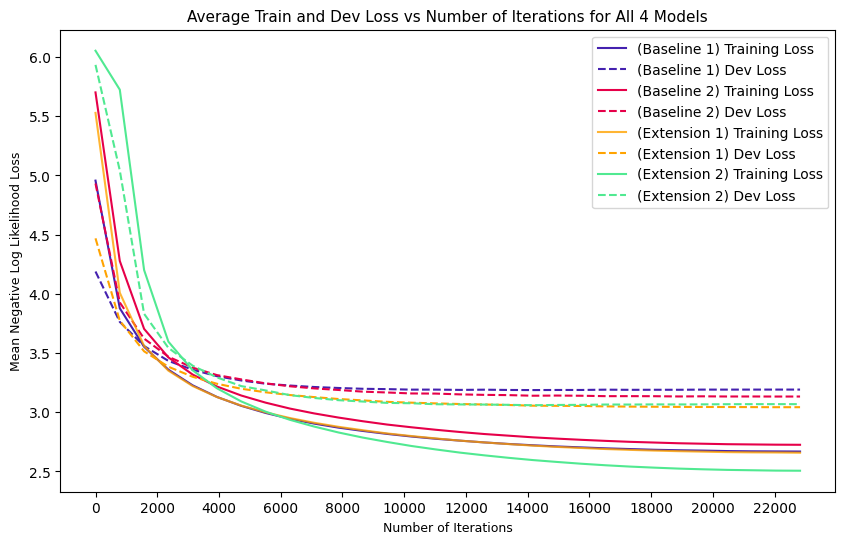

In [78]:
plt.figure(figsize=(10, 6))
plt.plot(iterations, train_loss_basic, color="#4421af", label="(Baseline 1) Training Loss")
plt.plot(iterations, val_loss_basic, color="#4421af", linestyle="dashed", label="(Baseline 1) Dev Loss")
plt.plot(iterations, train_loss_attn, color="#e60049", label="(Baseline 2) Training Loss")
plt.plot(iterations, val_loss_attn,color="#e60049", linestyle="dashed", label="(Baseline 2) Dev Loss")
plt.plot(iterations, train_loss_pre_embed, color="#ffa300", alpha=0.8, label="(Extension 1) Training Loss")
plt.plot(iterations, val_loss_pre_embed, color="#ffa300", linestyle="dashed", label="(Extension 1) Dev Loss")
plt.plot(iterations, train_loss_multilayer, color="#50e991", label="(Extension 2) Training Loss")
plt.plot(iterations, val_loss_multilayer, color="#50e991", linestyle="dashed", label="(Extension 2) Dev Loss")
plt.xticks(list(range(0, 22823, 2000)))
plt.xlabel("Number of Iterations", fontsize=10)
plt.ylabel("Mean Negative Log Likelihood Loss", fontsize=10)
plt.title("Average Train and Dev Loss vs Number of Iterations for All 4 Models", fontsize=11)
plt.legend()
plt.show()